<a href="https://colab.research.google.com/github/EnDFLab/EMCS_Project/blob/smart_meter_data_analytics/smart_meter_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
def read_csv(id):
  consumer = {"physics":"1DN8M_FNpJ73Zb43nap6910TrStzjIlyF",
              "management":"1DcuVrXwOICXyI_KtcYxp2WWEtsVn7m6x",
              "electrical":"1DnhLgBQ8YSqDmI7rA8nplQEAyOWH_oiO",
              "civil":"1DaW-MB6cVM8jm5MPTg8br6pxJdqIEsEQ",
              "boyshostel":"1DsGE4NfgtfM8CvPQ-Vvh5EjW2MMo1YXW",
              "biotech":"1D_Bb5EJHCejxnhzdhEqc6geRXxWtGr4_",
              "transformer":"1DynnA5YDAH9xJq7KIhIc4fSzrvH_y_22"
              }

  Url = "https://drive.google.com/uc?export=download&id=" + consumer[id]

  df = pd.read_csv(Url,skiprows = 1)
  print(df)
  return df


In [3]:
 # Convert 'Last Updated' column to datetime format and add timezone information
def format_csv(df):
    df['Last Updated'] = pd.to_datetime(df['Last Updated'])
    df['Last Updated'] = df['Last Updated'].dt.strftime('%Y-%m-%d %H:%M:%S') + '+00:00'
    df = df.set_index('Last Updated')
    return df

In [4]:
#export the formated data to csv
def export_formated_csv(df,id):
  df = df.drop(columns=['Voltage(V)', 'Current(A)', 'PF', 'Exported Energy(kWh)'])
  df['Grid Consumption(kWh)'] = pd.to_numeric(df['Grid Consumption(kWh)'], errors='coerce')
  df = df.pivot_table(index='Last Updated', values='Grid Consumption(kWh)', aggfunc='sum')
  df['Grid Consumption(kWh)'] = df['Grid Consumption(kWh)'] - df['Grid Consumption(kWh)'].shift(1)
  df = df.round(decimals=4)
  df.to_csv(id + '_sorted.csv')
  print("Exported Sucessfully")
  return


In [5]:
#Cretating Tuple of "physics" "management" "electrical" "civil" "boyshostel" "biotech" "transformer"

consumer_id = {"physics", "management", "electrical", "civil", "boyshostel", "biotech", "transformer"}
for id in consumer_id:
 df = read_csv(id)
 df = format_csv(df)
 export_formated_csv(df,id)



<ipython-input-2-7af76930fb20>:13: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Url,skiprows = 1)


              Last Updated      Meter  Voltage(V)  Current(A) Power(W)    PF  \
0        2024/1/7 12:00:26  Physics_a       238.6        0.58       72  0.52   
1        2024/1/7 12:05:19  Physics_a       233.0        0.49       66  0.58   
2        2024/1/7 12:11:36  Physics_a       234.1        3.21     -300 -0.40   
3        2024/1/7 12:16:39  Physics_a       232.8        1.32      132  0.43   
4        2024/1/7 12:20:33  Physics_a       232.6        1.28      130  0.44   
...                    ...        ...         ...         ...      ...   ...   
407457  2024/12/22 8:59:37  Physics_c       220.5        0.07        9  0.58   
407458  2024/12/22 9:00:36  Physics_c       221.4        0.07        9  0.58   
407459  2024/12/22 9:01:34  Physics_c       220.5        0.07        9  0.58   
407460  2024/12/22 9:02:33  Physics_c       218.5        0.07        9  0.59   
407461  2024/12/22 9:03:32  Physics_c       219.0        0.07        9  0.59   

       Grid Consumption(kWh)  Exported 

<ipython-input-2-7af76930fb20>:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Url,skiprows = 1)


               Last Updated          Meter  Voltage(V)  Current(A) Power(W)  \
0        2024/9/26 12:18:49  Boys_Hostel_a       227.4        1.30      252   
1        2024/9/26 12:20:46  Boys_Hostel_a       229.0        1.39      270   
2        2024/9/26 12:25:40  Boys_Hostel_a       227.9        1.40      270   
3        2024/9/26 12:30:33  Boys_Hostel_a       227.2        1.37      264   
4        2024/9/26 12:35:25  Boys_Hostel_a       224.8        1.29      245   
...                     ...            ...         ...         ...      ...   
209844  2024/12/22 10:02:44  Boys_Hostel_c       222.3       14.05    3,111   
209845  2024/12/22 10:03:43  Boys_Hostel_c       222.8       14.02    3,110   
209846  2024/12/22 10:04:42  Boys_Hostel_c       218.3       13.86    3,012   
209847  2024/12/22 10:05:40  Boys_Hostel_c       212.3       13.59    2,872   
209848  2024/12/22 10:06:39  Boys_Hostel_c       211.0       13.49    2,837   

          PF Grid Consumption(kWh)  Exported Energy

<ipython-input-2-7af76930fb20>:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Url,skiprows = 1)


               Last Updated    Meter  Voltage(V)  Current(A) Power(W)    PF  \
0        2024/1/11 10:13:43  Civil_a       232.0        5.69      621  0.47   
1        2024/1/11 10:15:37  Civil_a       233.2        5.60      622  0.48   
2        2024/1/11 10:21:33  Civil_a       232.6        7.90      869  0.47   
3        2024/1/11 10:25:23  Civil_a       233.1        5.43      596  0.47   
4        2024/1/11 10:30:16  Civil_a       232.2        5.65      570  0.43   
...                     ...      ...         ...         ...      ...   ...   
334777  2024/11/26 10:46:48  Civil_c       230.1        5.22      498  0.41   
334778  2024/11/26 10:51:40  Civil_c       231.8        5.27      492  0.40   
334779  2024/11/26 10:52:37  Civil_c       231.6        5.26      484  0.40   
334780  2024/11/26 10:53:34  Civil_c       231.2        5.18      491  0.41   
334781  2024/11/26 10:55:37  Civil_c       232.4        8.18      805  0.42   

       Grid Consumption(kWh)  Exported Energy(kWh) 

In [6]:
def calculate_daily_consumption(df, time_column='Last Updated', value_column='Grid Consumption(kWh)'):
    """
    Calculate daily consumption from a DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame with timestamp and consumption data.
    time_column (str): Column name containing timestamps.
    value_column (str): Column name containing consumption values.

    Returns:
    pd.DataFrame: DataFrame with daily summed values.
    """
    # Ensure the time_column is in datetime format
    df[time_column] = pd.to_datetime(df[time_column])

    # Set the time_column as the index
    df.set_index(time_column, inplace=True)

    # Group by date and sum the values in the value_column
    daily_consumption = df.groupby(pd.Grouper(freq='D'))[value_column].sum()

    return daily_consumption.reset_index()

In [7]:

df = pd.read_csv("biotech_sorted.csv")
daily_data = calculate_daily_consumption(df)
print(daily_data)






                 Last Updated  Grid Consumption(kWh)
0   2024-01-04 00:00:00+00:00                  7.857
1   2024-01-05 00:00:00+00:00                 31.606
2   2024-01-06 00:00:00+00:00                 18.551
3   2024-01-07 00:00:00+00:00                 27.325
4   2024-01-08 00:00:00+00:00                 22.879
..                        ...                    ...
305 2024-11-04 00:00:00+00:00                  0.000
306 2024-11-05 00:00:00+00:00                  0.000
307 2024-11-06 00:00:00+00:00                  0.000
308 2024-11-07 00:00:00+00:00                  0.000
309 2024-11-08 00:00:00+00:00                  0.000

[310 rows x 2 columns]


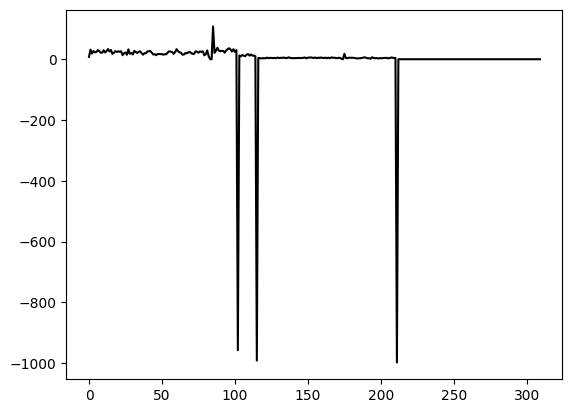

In [13]:
def plot_data(df,column="Grid Consumption(kWh)"):
  %matplotlib inline
  import matplotlib.pyplot as plt
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.plot(df[column],color="black")
  plt.show()

  return

plot_data(daily_data, column="Grid Consumption(kWh)")

